In [240]:
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [148]:
'''Loading xlsx file and droping first row '''
df = pd.read_excel(r"Admission 2019 Data for ISB Campus.xlsx", header=[1])
df.head()

,L,CITY,STATUS_ID,STATUS,Ist,2nd,3rd,4th,Ist.1,2nd.1,3rd.1,4th.1,Board,Degree,Total,Obtained,Board.1,Degree.1,Total.1,Obtained.1,NTS_MARKS,NU_TEST_CENTER,BBA,BS,Total.2,Obtained.2,Total.3,Obtained.3,NTS Merit Marks,BBA/BS(AF),BS.1,Campus,Discipline,Campus.1,Discipline.1,Campus.2,Discipline.2,DEGREE_STATUS
0,1900003,Rawalpindi,7,Challan Printed,ISB,NaN,NaN,NaN,BS(AF),NaN,NaN,NaN,Cambridge,O-Level,1000.0,900.0,Federal,HSSC (I+II),1050.0,900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900005,Okara,2,AcademicInfo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sahiwal,SSC,1100.0,1061.0,Sahiwal,HSSC-I,520.0,1061.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900006,Lahore,1,PersonalInfo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1900007,Peshawar,10,Admit Card Printed,PWR,NaN,NaN,NaN,BS(EE),BS(CS),NaN,NaN,Federal,SSC,1050.0,802.0,Federal,HSSC (I+II),1100.0,802.0,NaN,ISB,NaN,30.291665,NaN,NaN,NaN,NaN,NaN,NaN,51.87,NaN,NaN,PWR,BS(EE),NaN,NaN,NaN
4,1900008,Islamabad,10,Admit Card Printed,ISB,NaN,NaN,NaN,BS(CS),NaN,NaN,NaN,Federal,SSC,1050.0,728.0,Federal,HSSC (I+II),1100.0,728.0,78.0,ISB,NaN,47.187499,NaN,NaN,NaN,NaN,66.91,NaN,51.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
'''rename the column names '''
df.rename(columns = {'Ist.1': 'Discpline_Pref_1st', '2nd.1': 'Discpline_Pref_2nd','3rd.1': 'Discpline_Pref_3rd','4th.1': 'Discpline_Pref_4th'}, inplace = True)
df.rename(columns = {'Ist': 'Campus_Pref_1st', '2nd': 'Campus_Pref_2nd','3rd': 'Campus_Pref_3rd','4th': 'Campus_Pref_4th'}, inplace = True)
df.rename(columns = {'Board': 'Matriculation_Board', 'Degree': 'Matriculation_Degree','Total': 'Matriculation_Total','Obtained': 'Matriculation_Obtained'}, inplace = True)
df.rename(columns = {'BBA': 'NU_Test_Marks_BBA', 'BS': 'NU_Test_Marks_BS','Total.2': 'SAT_I_Total','Obtained.2': 'SAT_I_Obtained','Total.3': 'SAT_II_Total','Obtained.3': 'SAT_II_Obtained'}, inplace = True)
df.rename(columns = {'Board.1': 'Intermediate_Board', 'Degree.1': 'Intermediate_Degree','Total.1': 'Intermediate_Total','Obtained.1': 'Intermediate_Obtained'}, inplace = True)
df.rename(columns = {'Campus': 'NTS_Admission_Offer_Campus', 'Discipline': 'NTS_Admission_Offer_Discipline','Campus.1': 'NU_Admission_Offer_Campus','Discipline.1': 'NU_Admission_Offer_Discipline'}, inplace = True)
df.rename(columns = {'Campus.2': 'Admission_Campus', 'Discipline.2': 'Admission_Discipline'}, inplace = True)
df.rename(columns = {'BBA/BS(AF)': 'NU_Merit_Marks_BBA/BS(AF)', 'BS.1': 'NU_Merit_Marks_BS'}, inplace = True)

In [150]:
'''Filter only those rows whose admission is done or removing all values having NAn in Admission_Campus or Admission_Discipline columns '''
df.dropna(subset=['Admission_Campus','Admission_Discipline'], how='any',inplace=True)

In [151]:
'''droping rows of duplicate id'''
df = df.drop_duplicates('L', keep='last')

In [152]:
'''droping irrelevant dataset'''
df=df.drop(['CITY', 'STATUS_ID','STATUS','NU_TEST_CENTER','NU_Admission_Offer_Campus','NTS_Admission_Offer_Campus','SAT_I_Total','SAT_I_Obtained','SAT_II_Total','SAT_II_Obtained','Campus_Pref_4th','Discpline_Pref_4th'], axis=1)

In [153]:
'''droping rows of Nan values in matric or in intermediate means all the rows with any Nan value of intermediate.
if value is Nan then how h got admission so drop it'''
df.dropna(subset=['Matriculation_Board','Matriculation_Degree','Matriculation_Total','Matriculation_Obtained','Intermediate_Board','Intermediate_Degree','Intermediate_Total','Intermediate_Obtained'], how='any',inplace=True)

In [154]:
'''droping rows of students who  neither gave the entry test of NU or niether NTS test ,so these feilds are also garbagge'''
df.dropna(subset=['NU_Merit_Marks_BBA/BS(AF)','NU_Merit_Marks_BS'], how='all',inplace=True)

In [155]:
'''drop those students who didnt get offer by NU neither NTS'''
df.dropna(subset=['NTS_Admission_Offer_Discipline','NU_Admission_Offer_Discipline'], how='all',inplace=True)

In [156]:
df.shape

(2170, 26)

In [157]:
df.head()

,L,Campus_Pref_1st,Campus_Pref_2nd,Campus_Pref_3rd,Discpline_Pref_1st,Discpline_Pref_2nd,Discpline_Pref_3rd,Matriculation_Board,Matriculation_Degree,Matriculation_Total,Matriculation_Obtained,Intermediate_Board,Intermediate_Degree,Intermediate_Total,Intermediate_Obtained,NTS_MARKS,NU_Test_Marks_BBA,NU_Test_Marks_BS,NTS Merit Marks,NU_Merit_Marks_BBA/BS(AF),NU_Merit_Marks_BS,NTS_Admission_Offer_Discipline,NU_Admission_Offer_Discipline,Admission_Campus,Admission_Discipline,DEGREE_STATUS
19,1900027,KHI,NaN,NaN,BS(CS),NaN,NaN,Karachi,SSC,850.0,680.0,Karachi,HSSC-I,550.0,680.0,NaN,NaN,52.354163,NaN,NaN,60.81,NaN,BS(CS),KHI,BS(CS),Current
28,1900036,KHI,NaN,NaN,BS(CS),BS(SE),NaN,Agha Khan,SSC,1100.0,927.0,Agha Khan,HSSC-I,500.0,927.0,NaN,NaN,46.708330,NaN,NaN,61.35,NaN,BS(CS),KHI,BS(CS),Current
46,1900059,KHI,NaN,NaN,BS(CS),BS(SE),BS(EE),Mirpur Khas,SSC,850.0,693.0,Mirpur Khas,HSSC-I,550.0,693.0,77.0,NaN,67.180553,80.68,NaN,75.77,BS(CS),NaN,ISB,BS(CS),Current
53,1900069,LHR,NaN,NaN,BS(CS),BS(EE),BS(CV),Lahore,SSC,1100.0,930.0,Lahore,HSSC-I,520.0,930.0,NaN,NaN,50.319441,NaN,NaN,61.22,NaN,BS(EE),LHR,BS(EE),Current
56,1900072,LHR,NaN,NaN,BS(CS),NaN,NaN,Sahiwal,SSC,1100.0,1026.0,Sahiwal,HSSC-I,520.0,1026.0,NaN,NaN,55.874996,NaN,NaN,68.23,NaN,BS(CS),LHR,BS(CS),Current


# Question 1

calculting percentae using matric obtained marks and matric total marks and create a new column named as matric result and count the percentages between each intrvals and plot them

In [166]:
df['Matric_Result'] = (df['Matriculation_Obtained']/df['Matriculation_Total'])*100
Count=0
for i in df['Matric_Result']:
      if i>75:
        Count+=1
AdmissionOffer=[]
AdmissionOffer.append(len(df[df['Matric_Result']>90.0]))
AdmissionOffer.append(len(df[(df['Matric_Result']>80.0)&(df['Matric_Result']<=90.0)]))
AdmissionOffer.append(len(df[(df['Matric_Result']>70.0)&(df['Matric_Result']<=80.0)]))
AdmissionOffer.append(len(df[(df['Matric_Result']>60.0)&(df['Matric_Result']<=70.0)]))
AdmissionOfferPercCatType=["Above-90%","Above-80%","Above-70%","Above-60%"]

Text(0.5, 1.0, 'No of Students')

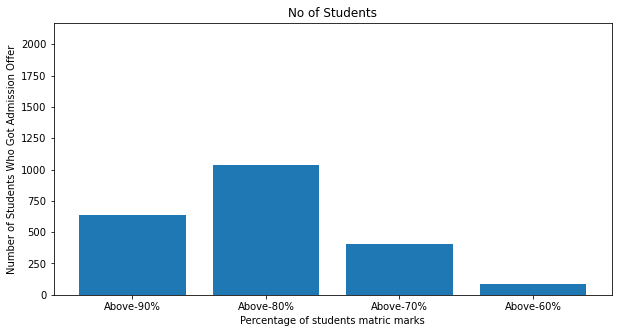

In [167]:
plt.figure(figsize=(10,5))
plt.ylim([0, len(df['Matric_Result'])])
plt.bar(AdmissionOfferPercCatType,AdmissionOffer)
plt.ylabel("Number of Students Who Got Admission Offer")
plt.xlabel("Percentage of students matric marks")
plt.title("No of Students")

# Question-2

In [235]:
Q7DF=df[['Intermediate_Total','Intermediate_Obtained']].copy()

In [236]:
mt=Q7DF['Intermediate_Total'].tolist()
mo=Q7DF['Intermediate_Obtained'].tolist()

In [237]:
for i in range(len(mt)):
    if mt[i]>mo[i]:
        print('yes')

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


thus all values in the  obtaine marks are greater thus assumption cannot be possible

# Question=3

In [242]:
df['DEGREE_STATUS']=df['DEGREE_STATUS'].replace(np.nan,'Disqualify')

In [244]:
df['DEGREE_STATUS'].value_counts()

Current        1939
Cancelled       221
Transferred       8
Not Joined        2
Name: DEGREE_STATUS, dtype: int64

<AxesSubplot:>

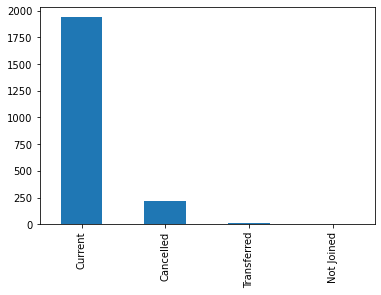

In [245]:
df['DEGREE_STATUS'].value_counts().plot(kind='bar')

# Question-5

Firstly I take the desired columns ,'Admission_Campus','Admission_Discipline', and then group by Admission campus with admisiion dicipline in a way that against every campus ,count of total disipline is placed and store it in another column named as count

In [189]:
Q5DF=df[['Admission_Campus','Admission_Discipline']].copy()

In [190]:
Q5DF.shape

(2170, 2)

In [198]:
Q5DF.groupby(['Admission_Campus']).Admission_Discipline.value_counts().reset_index(name='count')

,Admission_Campus,Admission_Discipline,count
0,CFD,BS(CS),170
1,CFD,BS(SE),52
2,CFD,BS(EE),28
3,CFD,BBA,24
4,ISB,BS(CS),320
5,ISB,BS(EE),104
6,ISB,BS(CSDF),53
7,ISB,BS(AI),49
8,ISB,BS(AF),36
9,ISB,BBA,35


<AxesSubplot:>

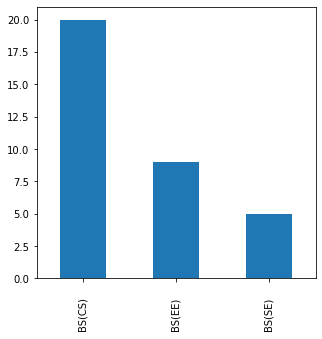

In [219]:
Q5DF=df[(df['Admission_Campus']=='PWR') & (df['DEGREE_STATUS']=='Current')]
Q5DF=Q5DF['Admission_Discipline'].value_counts()
Q5DF.plot(kind='bar',figsize=(5,5))

<AxesSubplot:>

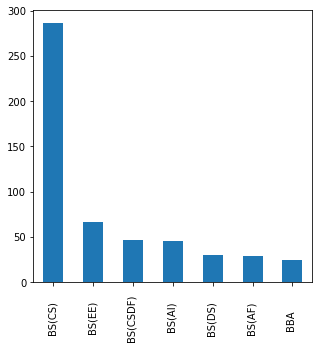

In [220]:
Q5DF=df[(df['Admission_Campus']=='ISB') & (df['DEGREE_STATUS']=='Current')]
Q5DF=Q5DF['Admission_Discipline'].value_counts()
Q5DF.plot(kind='bar',figsize=(5,5))

<AxesSubplot:>

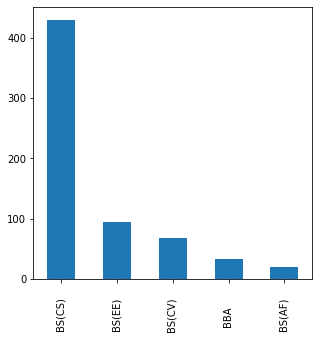

In [221]:
Q5DF=df[(df['Admission_Campus']=='LHR') & (df['DEGREE_STATUS']=='Current')]
Q5DF=Q5DF['Admission_Discipline'].value_counts()
Q5DF.plot(kind='bar',figsize=(5,5))

<AxesSubplot:>

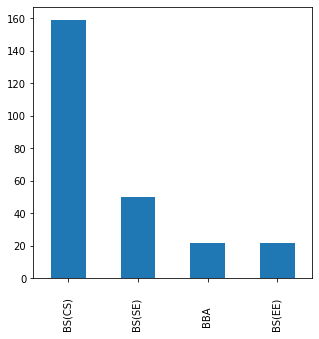

In [222]:
Q5DF=df[(df['Admission_Campus']=='CFD') & (df['DEGREE_STATUS']=='Current')]
Q5DF=Q5DF['Admission_Discipline'].value_counts()
Q5DF.plot(kind='bar',figsize=(5,5))

<AxesSubplot:>

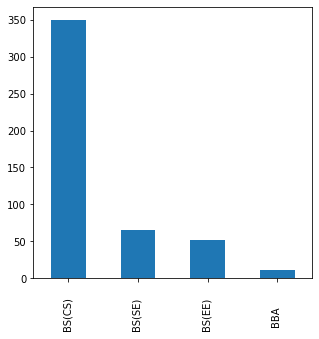

In [223]:
Q5DF=df[(df['Admission_Campus']=='KHI') & (df['DEGREE_STATUS']=='Current')]
Q5DF=Q5DF['Admission_Discipline'].value_counts()
Q5DF.plot(kind='bar',figsize=(5,5))

# Question-6

First I seprate the desired columns  , Matric result which I calcuated first. nd Nu test marks for BBA and Nu test Marks for BS and uses the pandas buid in function to plot a correlation between the columns and then using matshow draw correlation matrix 

In [204]:
Q6DF=df[['Matric_Result','NU_Test_Marks_BBA','NU_Test_Marks_BS']].copy()

In [209]:
Q6DF.corr()

,Matric_Result,NU_Test_Marks_BBA,NU_Test_Marks_BS
Matric_Result,1.000000,0.274508,0.370873
NU_Test_Marks_BBA,0.274508,1.000000,0.640952
NU_Test_Marks_BS,0.370873,0.640952,1.000000


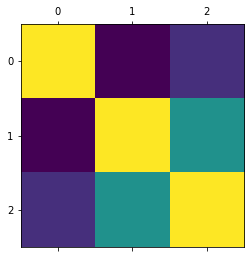

In [211]:
plt.matshow(Q6DF.corr())
plt.show()

# Question-7

In this I have simply get the desired two columns DEGREE_STATUS','Intermediate_Board, and check in the DEGREE_STATUS column that degree is current and then simply get the value count

In [224]:
Q7DF=df[['DEGREE_STATUS','Intermediate_Board']].copy()

In [227]:
Q7DF=Q7DF[(Q7DF['DEGREE_STATUS']=='Current')]

In [230]:
ls=Q7DF['Intermediate_Board'].value_counts()

<AxesSubplot:>

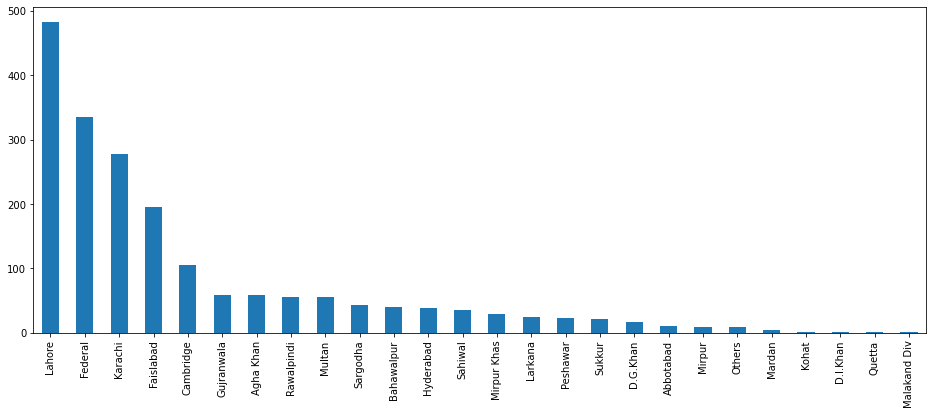

In [231]:
ls.plot(kind='bar',figsize=(16,6))

In [ ]:
# Question-7